## ACTD 2024 - 20

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [1]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [4]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [5]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(392, 8)

Codifiquemos la variable categórica Origin

In [8]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [9]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [11]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [12]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [13]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [14]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [15]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [16]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [17]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [18]:
import seaborn as sns

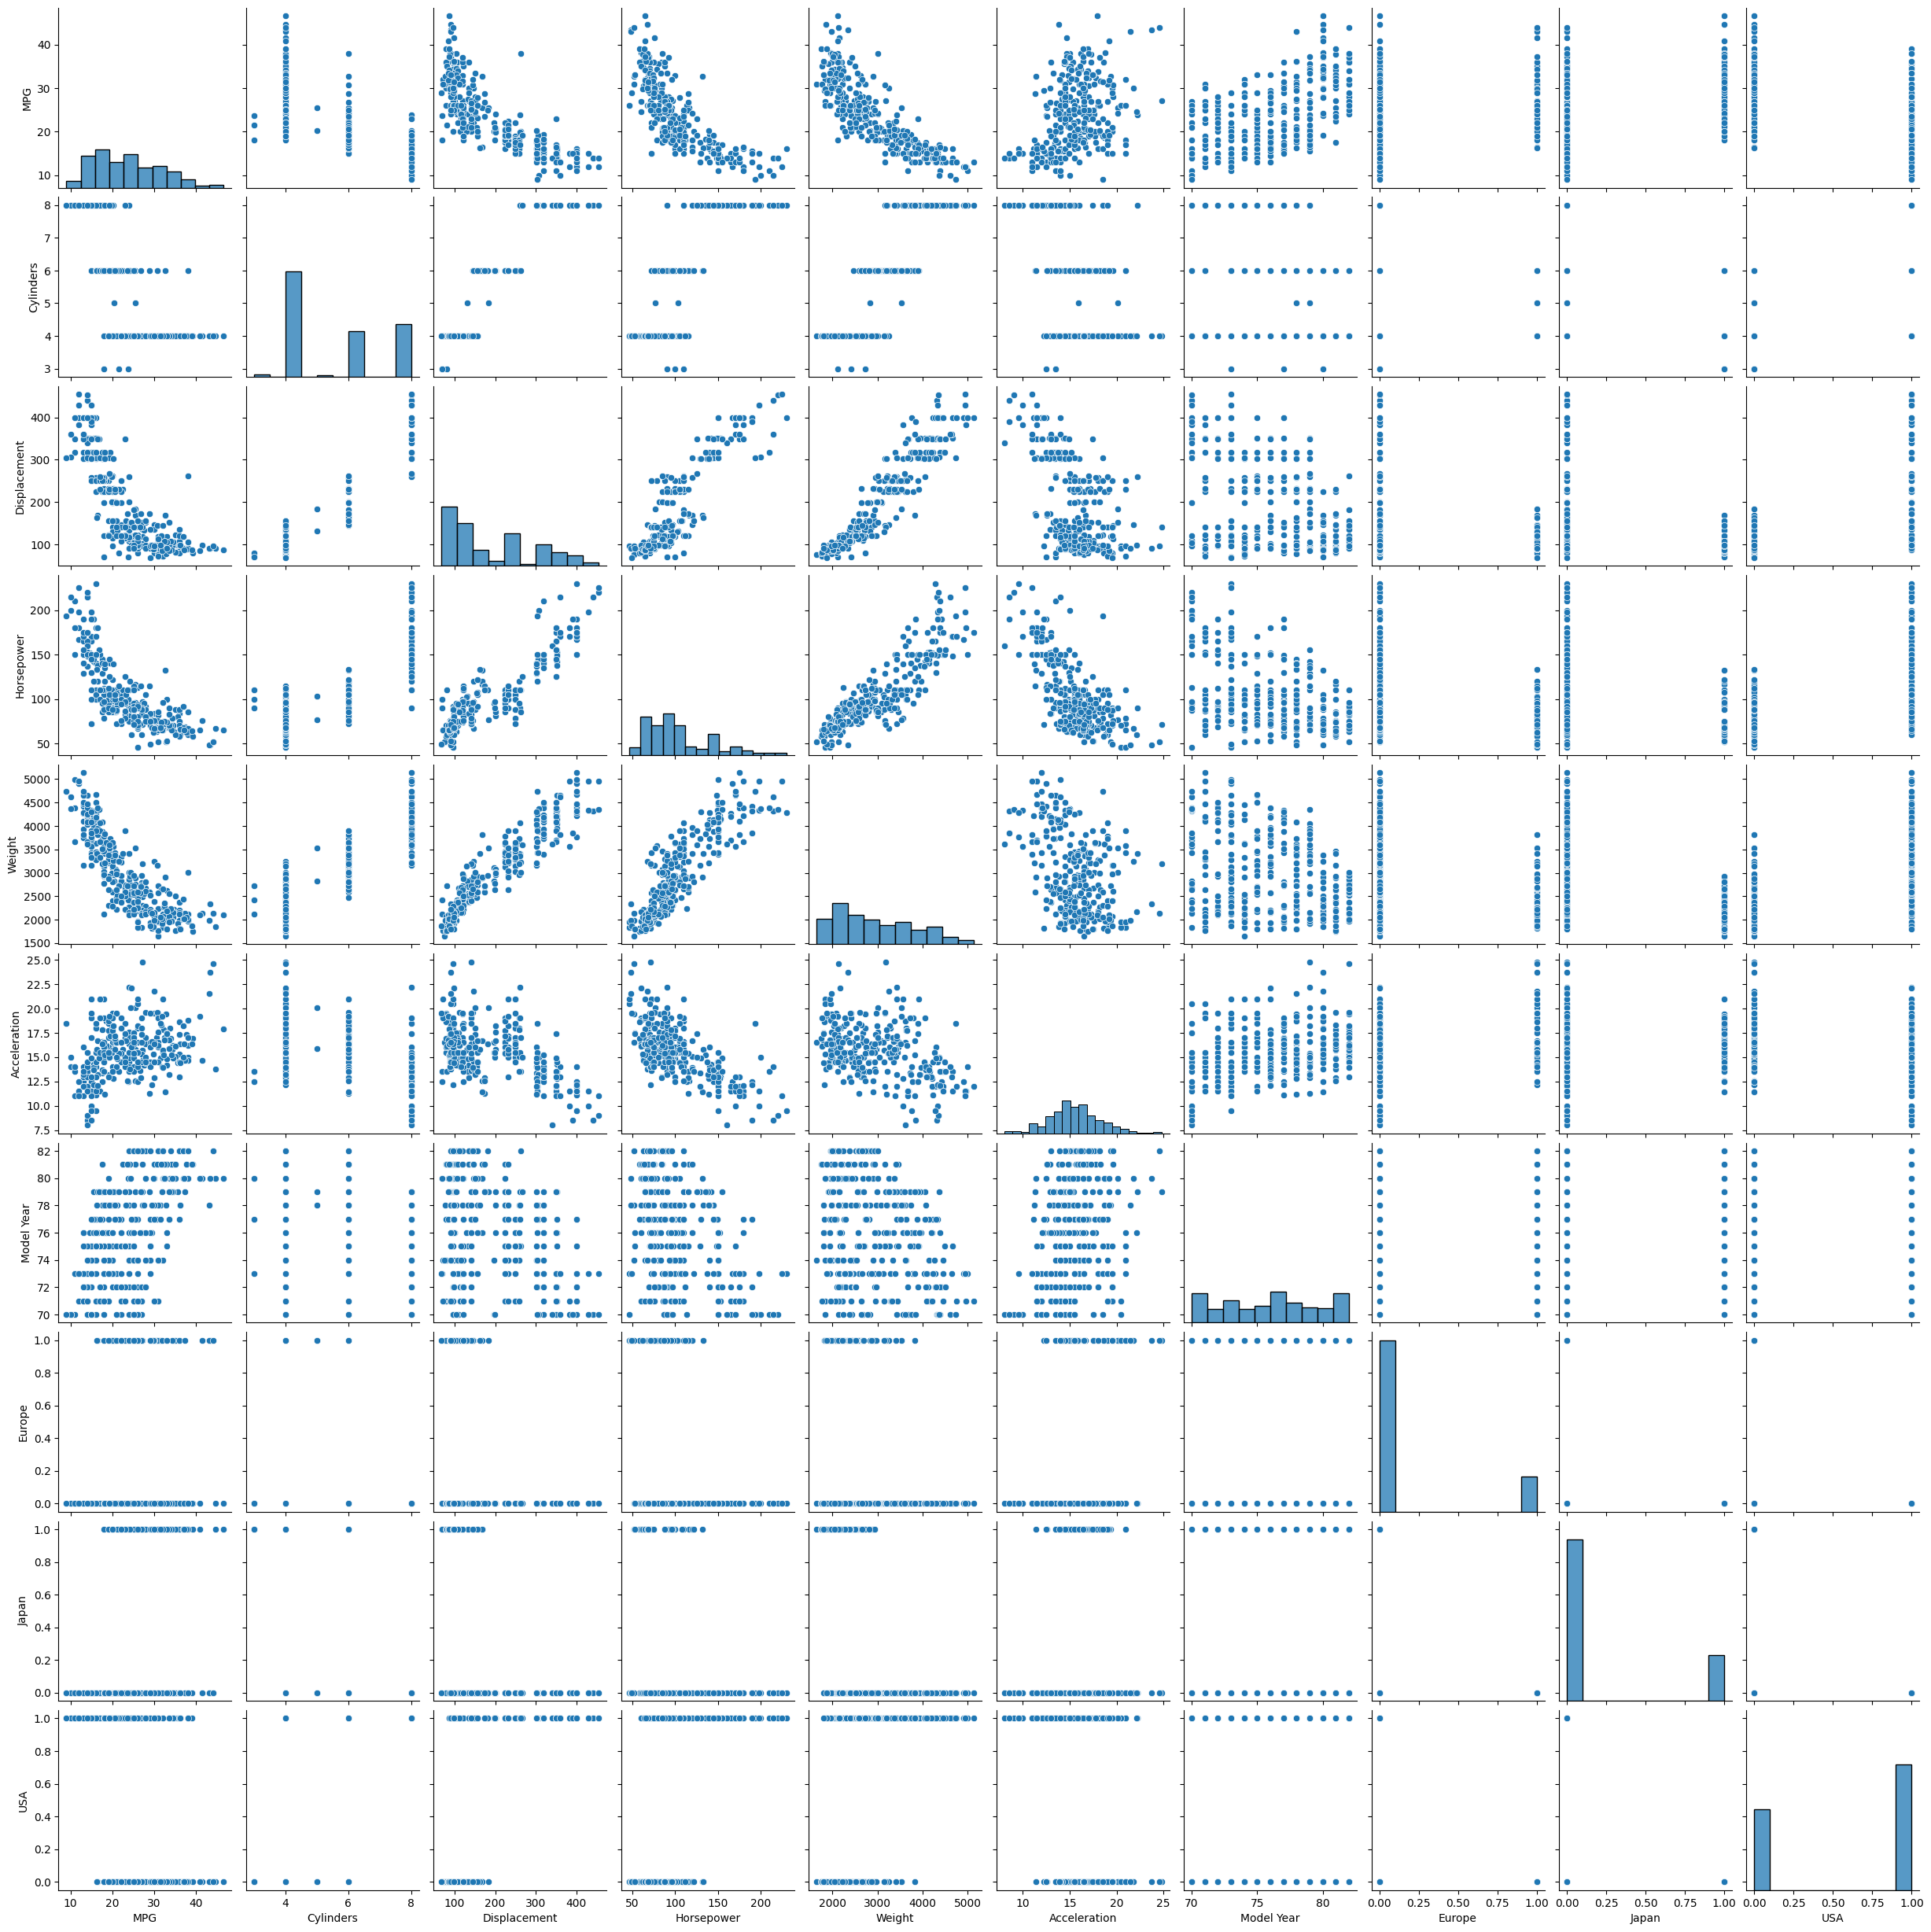

In [19]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [20]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816,0.249298,0.455161,-0.578826
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668,-0.352708,-0.416286,0.625791
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236,-0.372541,-0.455127,0.674072
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065,-0.291224,-0.327337,0.502808
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231,-0.304870,-0.454284,0.621043
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013,0.195310,0.110850,-0.245018
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000,-0.062402,0.237930,-0.153590
Europe,0.249298,-0.352708,-0.372541,-0.291224,-0.304870,0.195310,-0.062402,1.000000,-0.241853,-0.567903
Japan,0.455161,-0.416286,-0.455127,-0.327337,-0.454284,0.110850,0.237930,-0.241853,1.000000,-0.661311
USA,-0.578826,0.625791,0.674072,0.502808,0.621043,-0.245018,-0.153590,-0.567903,-0.661311,1.000000


<Axes: >

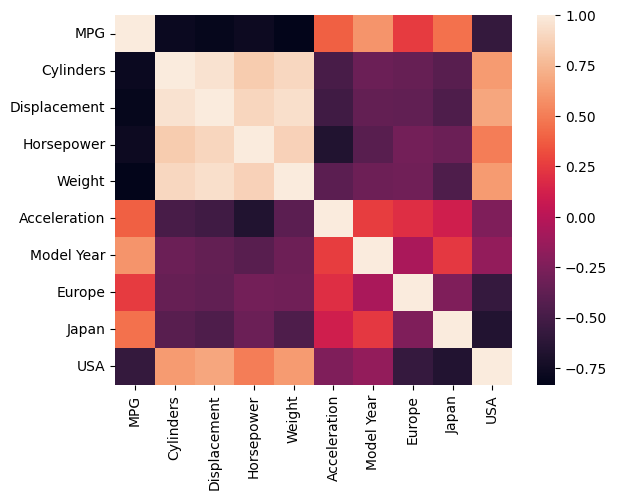

In [21]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [22]:
train_X = train.copy()
test_X = test.copy()

In [23]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [24]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [25]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [26]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int32
Japan             int32
USA               int32
dtype: object

Construyamos los modelos usando tensorflow

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.17.0'

Capa de normalización y Variables Base

In [29]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [30]:
Variables = ["Displacement", "Horsepower", "Weight", "Acceleration"]
Cantidad = len(Variables)

## Modelos Base

In [31]:
Var_Base = np.array(train_X[Variables])

norm_base = tf.keras.layers.Normalization(input_shape=[Cantidad,])

norm_base.adapt(Var_Base)

c:\Users\Jeronimo Vargas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
import matplotlib.pyplot as plt
test_res = {}
test_res
modelo_base = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_base.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_base.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [33]:
%%time
history_Base = modelo_base.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 23.8056 - val_loss: 22.1812
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.1627 - val_loss: 21.7558
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.1166 - val_loss: 21.2435
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6860 - val_loss: 20.5638
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.2638 - val_loss: 19.6326
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.1542 - val_loss: 18.3774
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.3924 - val_loss: 16.7346
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.8415 - val_loss: 14.8514
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5358 - val_loss: 12.9075
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.1105 - val_loss: 11.0162
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1875 - val_loss: 8.7904
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.88

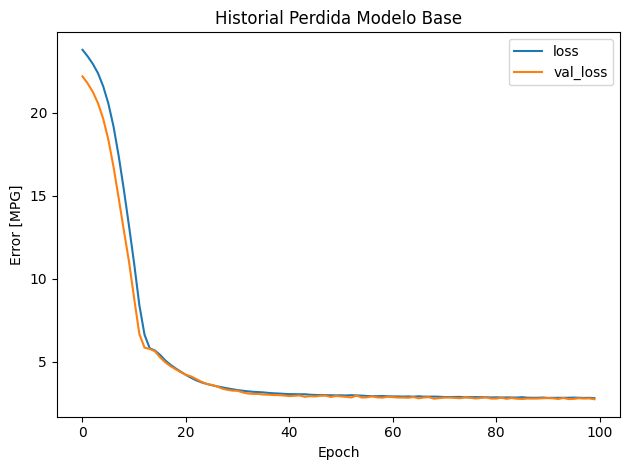

In [34]:
plt.plot(history_Base.history['loss'], label='loss')
plt.plot(history_Base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial Perdida Modelo Base")
plt.legend()
plt.tight_layout()
plt.savefig("Perdida_Modelo_Base.png")

In [35]:
test_res['Modelo_Base'] = modelo_base.evaluate(
    test_X[Variables], test_y,
    verbose=0)
test_res

{'Modelo_Base': 2.6934330463409424}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


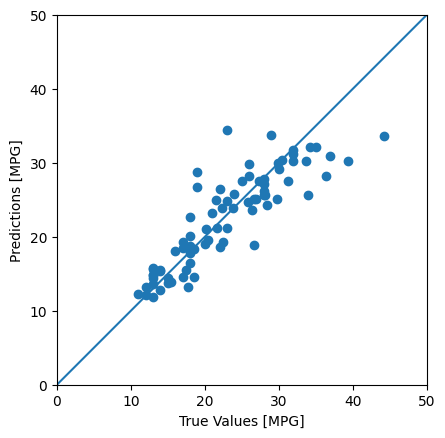

In [36]:
test_pred_base = modelo_base.predict(test_X[Variables]).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred_base)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

## Modelos Distintas Neuronas

### 16 Neuronas

In [37]:
modelo_16_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_16_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_16_Neuronas.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 9 (40.00 B)

In [38]:
%%time
history_16_Neuronas = modelo_16_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 23.2097 - val_loss: 21.9643
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1286 - val_loss: 21.7421
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.2720 - val_loss: 21.5066
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.4109 - val_loss: 21.2523
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8061 - val_loss: 20.9754
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2960 - val_loss: 20.6737
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.4036 - val_loss: 20.3403
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.4724 - val_loss: 19.9677
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.5287 - val_loss: 19.5513
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.0740 - val_loss: 19.0815
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.8141 - val_loss: 18.5609
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.

In [39]:
test_res['Modelo_16_Neuronas'] = modelo_16_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.6934330463409424, 'Modelo_16_Neuronas': 2.7636361122131348}

### 32 Neuronas

In [40]:
modelo_32_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_32_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_32_Neuronas.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,258 (4.92 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 9 (40.00 B)

In [41]:
%%time
history_32_Neuronas = modelo_32_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 24.0276 - val_loss: 22.4622
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.1170 - val_loss: 22.1830
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.6626 - val_loss: 21.9180
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1878 - val_loss: 21.6390
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.2949 - val_loss: 21.3327
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.8501 - val_loss: 20.9694
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.7203 - val_loss: 20.5450
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.2337 - val_loss: 20.0361
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.0175 - val_loss: 19.4231
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3593 - val_loss: 18.6968
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2363 - val_loss: 17.8287
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19

In [42]:
test_res['Modelo_32_Neuronas'] = modelo_32_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583}

### 128 Neuronas

In [43]:
modelo_128_Neuronas = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
  ])

modelo_128_Neuronas.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

modelo_128_Neuronas.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,290 (67.54 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 9 (40.00 B)

In [44]:
%%time
history_128_Neuronas = modelo_128_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.7481 - val_loss: 21.6177
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4670 - val_loss: 20.6293
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.6315 - val_loss: 19.2224
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.6741 - val_loss: 17.2230
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.0788 - val_loss: 15.1403
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.8983 - val_loss: 13.2536
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.6133 - val_loss: 10.7455
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.5665 - val_loss: 7.7781
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9509 - val_loss: 6.4026
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4744 - val_loss: 6.6326
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4845 - val_loss: 6.1031
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7026 - 

In [45]:
test_res['Modelo_128_Neuronas'] = modelo_128_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236}

### Graficas

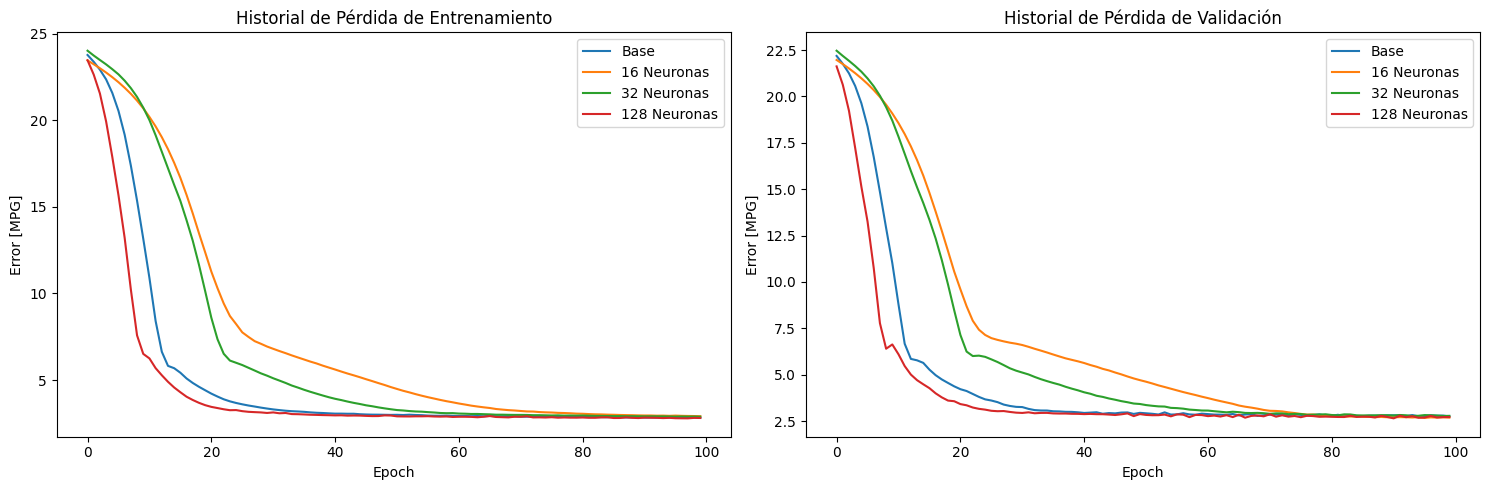

In [46]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_16_Neuronas.history['loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['loss'], label='32 Neuronas')
plt.plot(history_128_Neuronas.history['loss'], label='128 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_16_Neuronas.history['val_loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['val_loss'], label='32 Neuronas')
plt.plot(history_128_Neuronas.history['val_loss'], label='128 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Neuronas.png")

## Modelos Distintas Capas

### 1 Capa

In [47]:
modelo_1_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_1_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_1_Capa.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 9 (40.00 B)

In [48]:
%%time
history_1_Capa = modelo_1_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 23.3268 - val_loss: 22.3353
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.1133 - val_loss: 22.1289
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.4036 - val_loss: 21.9249
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3222 - val_loss: 21.7179
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2317 - val_loss: 21.5039
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2713 - val_loss: 21.2810
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4486 - val_loss: 21.0501
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1249 - val_loss: 20.8067
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.8598 - val_loss: 20.5470
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0360 - val_loss: 20.2769
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.5373 - val_loss: 19.9851
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.

In [49]:
test_res['Modelo_1_Capa'] = modelo_1_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res


{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502}

### 2 Capas

In [50]:
modelo_2_Capa = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2)
  ])

In [51]:
modelo_2_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [52]:
modelo_2_Capa.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,619 (18.05 KB)

 Trainable params: 4,610 (18.01 KB)

 Non-trainable params: 9 (40.00 B)

In [53]:
%%time
history_2_Capa = modelo_2_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 23.3564 - val_loss: 22.3696
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0741 - val_loss: 22.0935
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4821 - val_loss: 21.7693
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.4332 - val_loss: 21.3386
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0335 - val_loss: 20.7284
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8866 - val_loss: 19.8547
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.8684 - val_loss: 18.6544
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.8752 - val_loss: 17.0788
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.2386 - val_loss: 15.3162
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.4712 - val_loss: 13.6952
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6913 - val_loss: 11.9590
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.6

In [54]:
test_res['Modelo_5_Capa'] = modelo_2_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502,
 'Modelo_5_Capa': 2.656109571456909}

### 5 Capas

In [55]:
modelo_5_Capa = tf.keras.Sequential([
    norm_base,  # Capa de normalización
    tf.keras.layers.Dense(64, activation='relu'),  # Primera capa oculta con 64 unidades
    tf.keras.layers.Dense(64, activation='relu'),  # Segunda capa oculta con 64 unidades
    tf.keras.layers.Dense(64, activation='relu'),  # Tercera capa oculta con 64 unidades
    tf.keras.layers.Dense(64, activation='relu'),  # Cuarta capa oculta con 64 unidades
    tf.keras.layers.Dense(5)  # Capa de salida con 5 neuronas (sin activación explícita)
])

modelo_5_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_5_Capa.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,134 (51.31 KB)

 Trainable params: 13,125 (51.27 KB)

 Non-trainable params: 9 (40.00 B)

In [56]:
%%time
history_5_Capa = modelo_5_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 24.0108 - val_loss: 22.1754
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3019 - val_loss: 21.6963
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8057 - val_loss: 20.6722
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.6348 - val_loss: 18.4098
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.5341 - val_loss: 14.5347
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6801 - val_loss: 10.4867
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3672 - val_loss: 9.0711
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8218 - val_loss: 6.2931
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3282 - val_loss: 5.4667
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7904 - val_loss: 5.2945
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1686 - val_loss: 4.9802
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8247 - val_l

In [57]:
test_res['Modelo_5_Capa'] = modelo_5_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)
test_res

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502,
 'Modelo_5_Capa': 2.6988980770111084}

### Gráficas

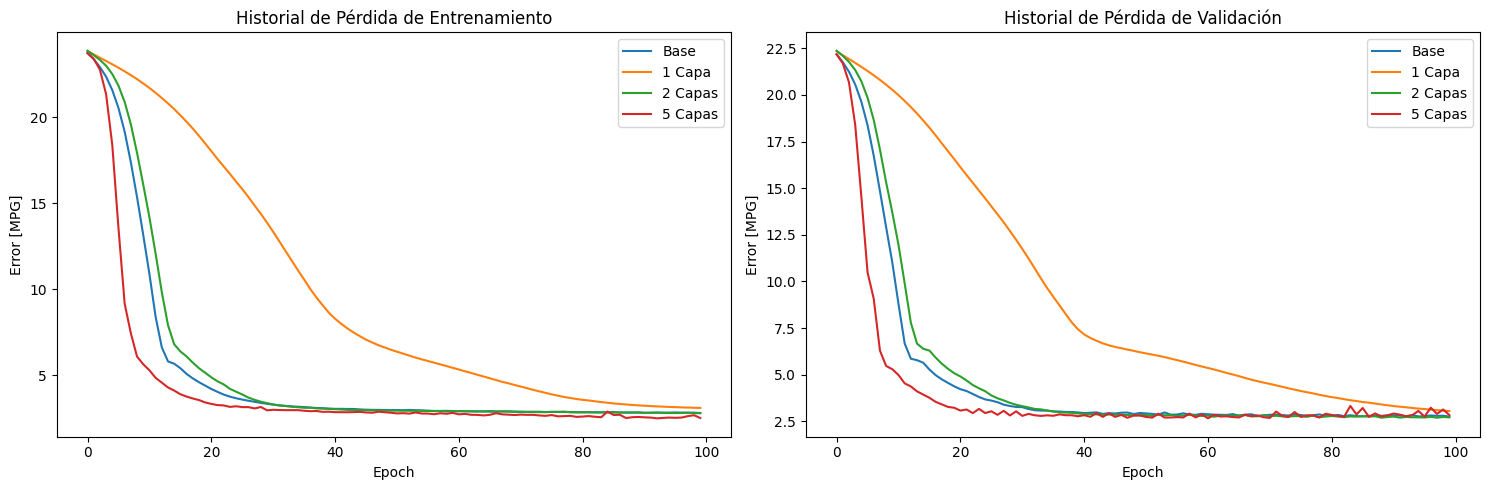

In [58]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_1_Capa.history['loss'], label='1 Capa')
plt.plot(history_2_Capa.history['loss'], label='2 Capas')
plt.plot(history_5_Capa.history['loss'], label='5 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_1_Capa.history['val_loss'], label='1 Capa')
plt.plot(history_2_Capa.history['val_loss'], label='2 Capas')
plt.plot(history_5_Capa.history['val_loss'], label='5 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Capas.png")

## Modelos Distintas Funciones Activación

### TanH: tangente hiperbólica

In [59]:
modelo_TanH = tf.keras.Sequential([
        norm_base,
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])

modelo_TanH.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_TanH.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [60]:
%%time
history_TanH = modelo_TanH.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 24.2503 - val_loss: 22.3747
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.9093 - val_loss: 22.2482
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4006 - val_loss: 22.0937
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.0512 - val_loss: 21.8884
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8630 - val_loss: 21.6179
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4248 - val_loss: 21.2698
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.2498 - val_loss: 20.8317
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3166 - val_loss: 20.2756
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.1854 - val_loss: 19.5166
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.4898 - val_loss: 18.5388
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.6971 - val_loss: 17.1670
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.1

### Sigmoide

In [61]:
modelo_Sig = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])

modelo_Sig.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_Sig.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [62]:
%%time
history_Sig = modelo_Sig.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Sig'] = modelo_Sig.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 24.6300 - val_loss: 22.5621
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.1162 - val_loss: 21.6685
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1567 - val_loss: 20.8251
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1712 - val_loss: 20.0454
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.3655 - val_loss: 19.3339
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.1434 - val_loss: 18.6900
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3457 - val_loss: 18.1074
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.7169 - val_loss: 17.5761
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3420 - val_loss: 17.0848
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.4019 - val_loss: 16.6207
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5366 - val_loss: 16.1743
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.5

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502,
 'Modelo_5_Capa': 2.6988980770111084,
 'Modelo_Sig': 3.5382001399993896}

### ELU: (Exponential Linear Unit)


In [63]:
modelo_ELU = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='elu'),
      tf.keras.layers.Dense(64, activation='elu'),
      tf.keras.layers.Dense(1)
  ])

modelo_ELU.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_ELU.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [64]:
%%time
history_ELU = modelo_ELU.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_ELU'] = modelo_ELU.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 23.8504 - val_loss: 22.2324
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.8185 - val_loss: 21.9600
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.2896 - val_loss: 21.6097
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.0754 - val_loss: 21.1544
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.9578 - val_loss: 20.5427
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2202 - val_loss: 19.7261
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.6535 - val_loss: 18.6330
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.8281 - val_loss: 17.1856
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.2270 - val_loss: 15.3049
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9338 - val_loss: 13.0318
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.2807 - val_loss: 10.9916
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502,
 'Modelo_5_Capa': 2.6988980770111084,
 'Modelo_Sig': 3.5382001399993896,
 'Modelo_ELU': 2.749922037124634}

### Gráficas

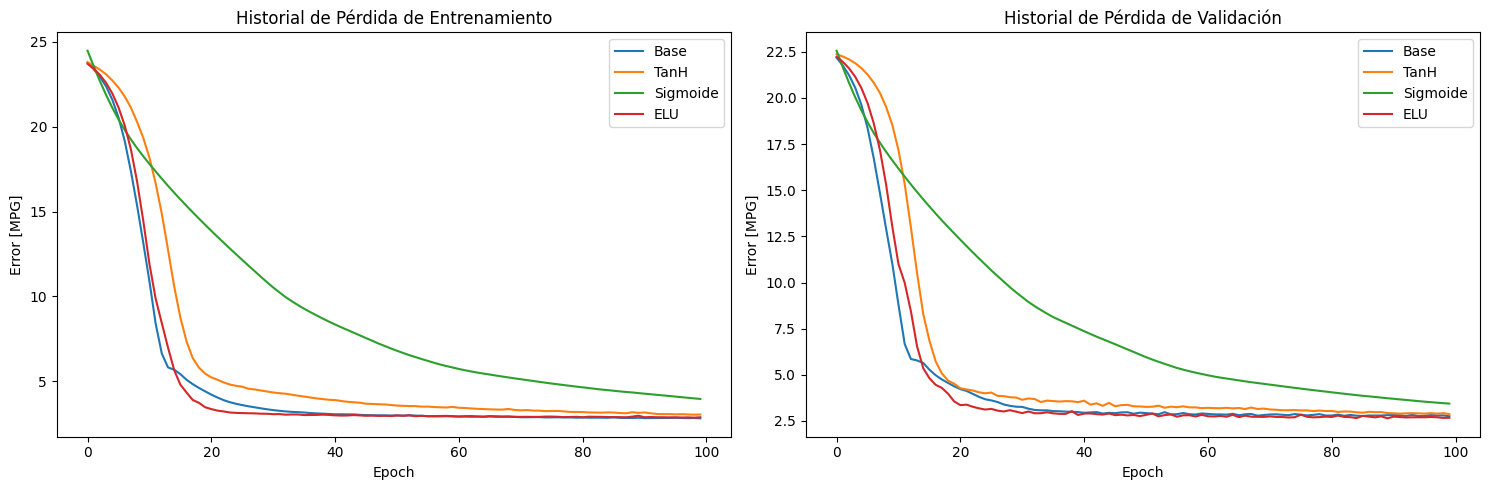

In [65]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_TanH.history['loss'], label='TanH')
plt.plot(history_Sig.history['loss'], label='Sigmoide')
plt.plot(history_ELU.history['loss'], label='ELU')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_TanH.history['val_loss'], label='TanH')
plt.plot(history_Sig.history['val_loss'], label='Sigmoide')
plt.plot(history_ELU.history['val_loss'], label='ELU')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()

plt.tight_layout()
plt.savefig("Perdida_Funcion.png")

### Dos modelos difernetes al BASE

In [66]:
# Modelo 1: Red Neuronal con Regularización L2
modelo_L2 = tf.keras.Sequential([
    norm_base,
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)
])

modelo_L2.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001))

modelo_L2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [67]:
%%time
history_L2 = modelo_L2.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_L2'] = modelo_L2.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 23.5218 - val_loss: 21.9319
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.9867 - val_loss: 21.3733
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.8380 - val_loss: 20.7353
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.6012 - val_loss: 19.9346
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.4004 - val_loss: 18.9131
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.6562 - val_loss: 17.6021
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.6059 - val_loss: 16.1982
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4014 - val_loss: 14.9343
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.6316 - val_loss: 13.7004
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.5093 - val_loss: 12.2089
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.4506 - val_loss: 10.4014
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502,
 'Modelo_5_Capa': 2.6988980770111084,
 'Modelo_Sig': 3.5382001399993896,
 'Modelo_ELU': 2.749922037124634,
 'Modelo_L2': 2.7777440547943115}

In [68]:
# Modelo 2: Red Neuronal con Dropout
modelo_Dropout = tf.keras.Sequential([
    norm_base,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

modelo_Dropout.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(0.001))

modelo_Dropout.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [69]:
%%time
history_Dropout = modelo_Dropout.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Dropout'] = modelo_Dropout.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 24.1967 - val_loss: 22.1332
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2374 - val_loss: 21.6994
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8005 - val_loss: 21.2056
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.4266 - val_loss: 20.5865
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.7929 - val_loss: 19.7764
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2063 - val_loss: 18.7152
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.9319 - val_loss: 17.3159
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.2731 - val_loss: 15.5480
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.7498 - val_loss: 13.6704
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.8207 - val_loss: 11.5820
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.1140 - val_loss: 9.3982
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5

{'Modelo_Base': 2.6934330463409424,
 'Modelo_16_Neuronas': 2.7636361122131348,
 'Modelo_32_Neuronas': 2.678391695022583,
 'Modelo_128_Neuronas': 2.7092487812042236,
 'Modelo_1_Capa': 2.876671314239502,
 'Modelo_5_Capa': 2.6988980770111084,
 'Modelo_Sig': 3.5382001399993896,
 'Modelo_ELU': 2.749922037124634,
 'Modelo_L2': 2.7777440547943115,
 'Modelo_Dropout': 2.723456859588623}

## Graficas entrenamiento y validacion 

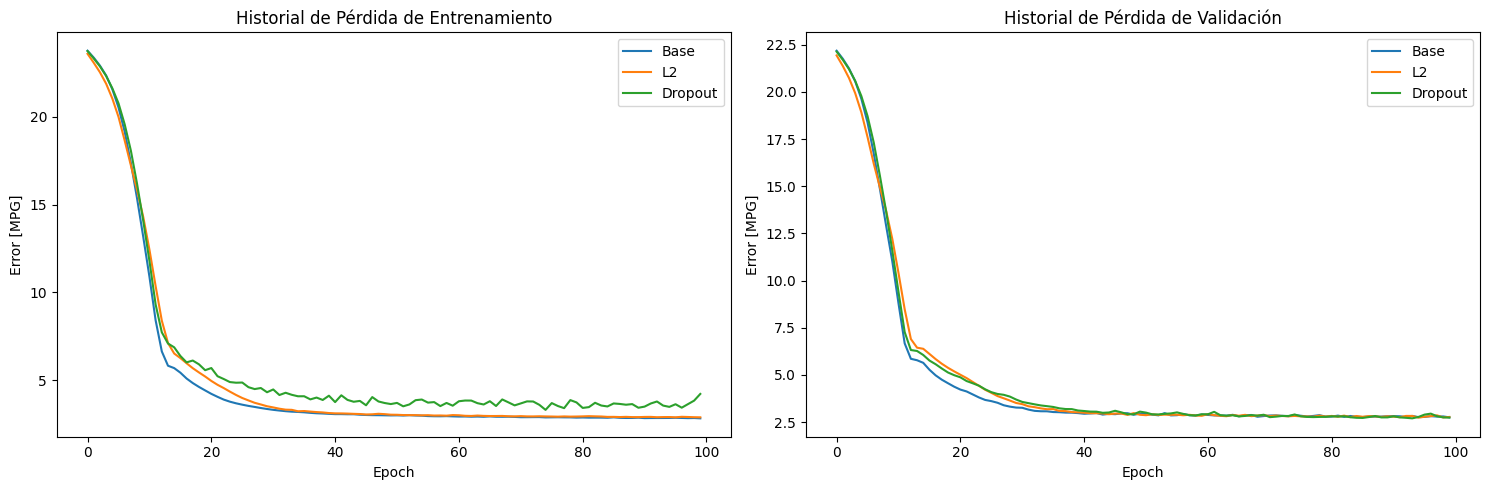

In [70]:
# Graficas
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_L2.history['loss'], label='L2')
plt.plot(history_Dropout.history['loss'], label='Dropout')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")

plt.legend()

plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_L2.history['val_loss'], label='L2')
plt.plot(history_Dropout.history['val_loss'], label='Dropout')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")

plt.legend()

plt.tight_layout()

plt.savefig("Perdida_Regularizacion.png")